In this notebook we try to predict the house value based on other features given in the data set

### Imports

In [34]:
import numpy as np  
import pandas as pd 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [3]:
housing_data = pd.read_csv("./housing.csv")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data overview

In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f56478290>,
      dtype=object)

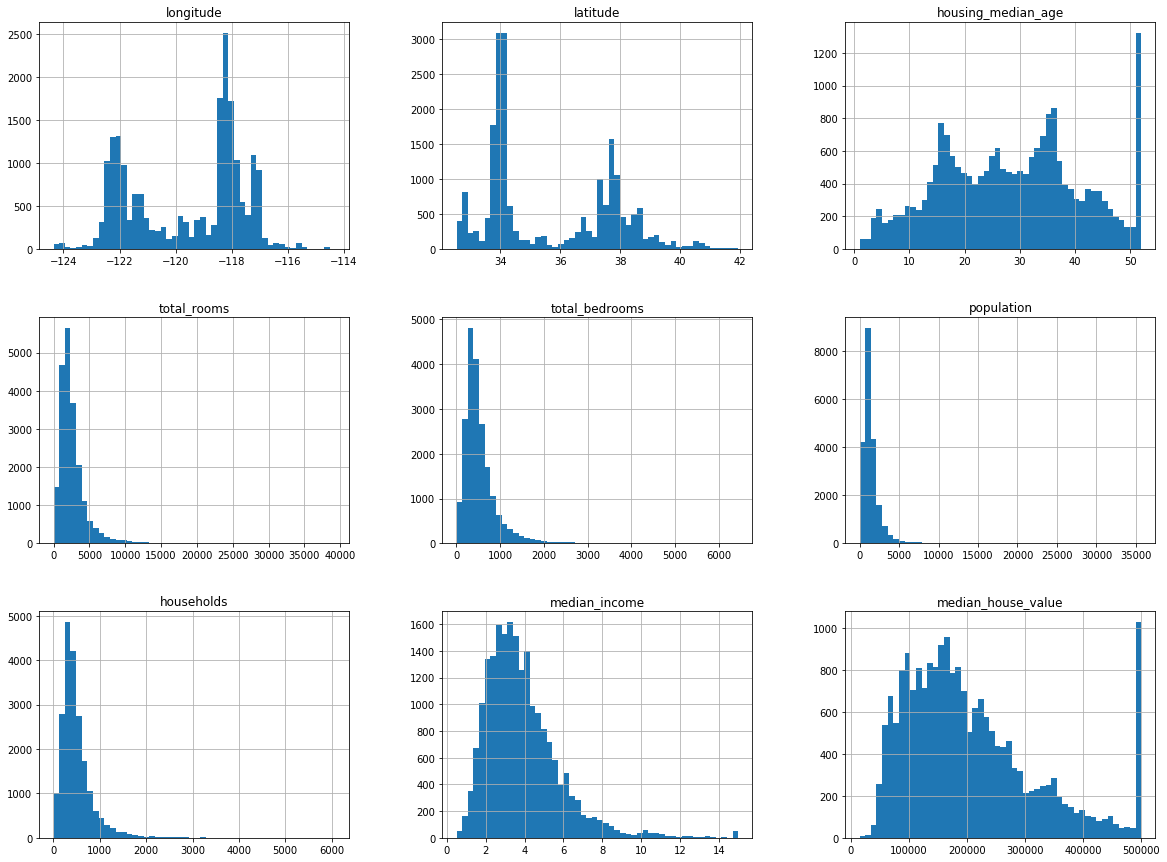

In [16]:
housing_data.hist(bins=50, figsize=(20,15))

### Data  Visualization

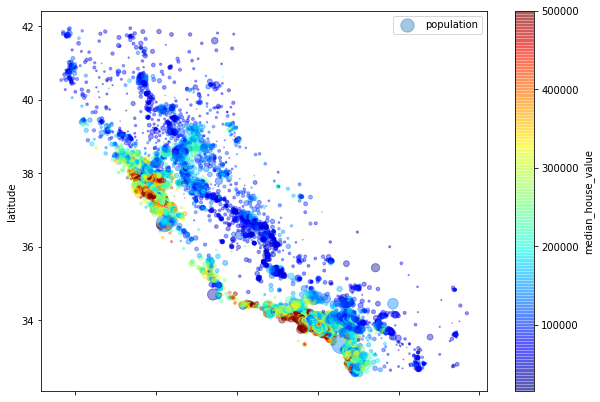

In [24]:
housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing_data['population']/100, 
                  label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True       
                 )

The radius of each circle represents the popultion

### Correlations

In [28]:
cor_mat = housing_data.corr()
cor_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f4254a250>,
      dtype=object)

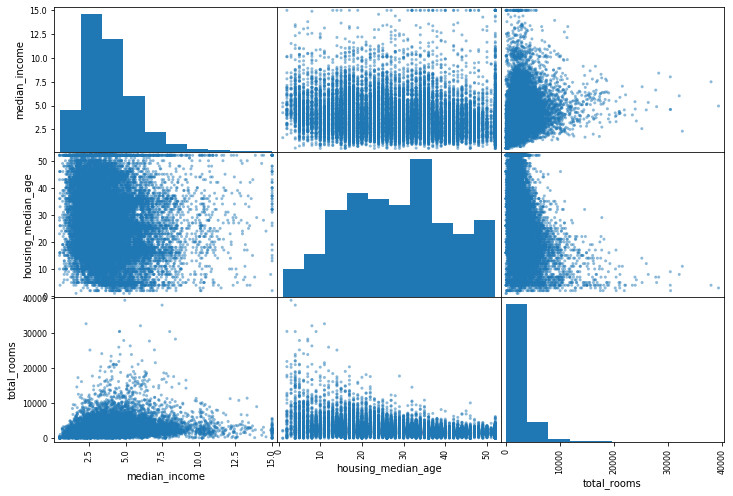

In [33]:
scatter_matrix(housing_data[['median_income','housing_median_age', 'total_rooms']], figsize=(12,8))

## Data Preprocessing

## using one hot encoding to convert catagorical value to numeric

In [35]:
data = pd.get_dummies(housing_data)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## Handling missing data using imputation

In [36]:
print(data.isnull().sum())

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [37]:
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(data)
imputed_data = pd.DataFrame(imputed_data, columns = data.columns)

print(imputed_data.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


### Scaling the data

In [38]:
min_max_scaler = MinMaxScaler()
scaled_data =  min_max_scaler.fit_transform(imputed_data) 
scaled_data = pd.DataFrame(scaled_data, columns = imputed_data.columns)

### Splitting data

In [39]:
X = scaled_data.drop('median_house_value', axis=1)
y = scaled_data['median_house_value']  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


## Using Linear Regression

In [40]:
linear_reg = LinearRegression()
linear_model = linear_reg.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
predictions

array([0.41567993, 0.56167603, 0.33917236, ..., 0.15307617, 0.49557495,
       0.40869141])

## Model Evaluation

In [41]:
print('MAE',mean_absolute_error(y_test, predictions))
print('MSE', mean_squared_error(y_test, predictions))
print('R2 score', r2_score(y_test, predictions))

MAE 0.10246227516418019
MSE 0.020058485437217097
R2 score 0.6381549590299889


## Using Neural Network

In [42]:
nn = MLPRegressor(random_state=1, max_iter=300,  n_iter_no_change=10)
nn_model = nn.fit(X_train, y_train)

In [43]:
nn_predictions = nn_model.predict(X_test) 

In [44]:
print('mean accuracy on the given test data and labels.', nn_model.score(X_test, y_test))

mean accuracy on the given test data and labels. 0.6986935057664683


## Using Decision Tree Regressor

In [45]:
dec_tree_reg = DecisionTreeRegressor()
dec_tree_model = dec_tree_reg.fit(X_train, y_train)

In [47]:
dec_predict = dec_tree_model.predict(X_test)

In [48]:
print('MAE',mean_absolute_error(y_test, dec_predict))
print('MSE', mean_squared_error(y_test, dec_predict))
print('R2 score', r2_score(y_test, dec_predict))

MAE 0.08927572221871123
MSE 0.020063058773153123
R2 score 0.638072458337984
